## 練習1:代數展開
公式：

$[ (x + y)^3 ]$

$ x^{3} + 3 x^{2} y + 3 x y^{2} + y^{3} $

In [6]:
import sympy as sp
from IPython.display import display,Math
x,y = sp.symbols('x y')
expr1 = (x +y) ** 3
expand_expr1 = sp.expand(expr1)
print(expand_expr1)
print(sp.latex(expand_expr1))
mathObj = Math(sp.latex(expand_expr1))
display(mathObj)

x**3 + 3*x**2*y + 3*x*y**2 + y**3
x^{3} + 3 x^{2} y + 3 x y^{2} + y^{3}


<IPython.core.display.Math object>

### 練習2：因式分解
公式：
$[ x^3 + 3x^2 + 3x + 1 ]$

In [8]:
x = sp.symbols("x")
expr2 = x**3 + 3* x ** 2 + 3*x + 1
f_expr2 = sp.factor(expr2)
display(Math(sp.latex(f_expr2)))

<IPython.core.display.Math object>

### 練習4：符號代入
公式：
$[ x^2 + y^2 ]$
並代入 $( x = 1 )$ 和 $( y = 2 )$

In [10]:
x,y = sp.symbols("ｘ y")
expr4 = x ** 2 + y **2
sub_exp4 =  expr4.subs(x,1).subs(y,2)
print(sub_exp4)

5


## 微分

- $ f(x) = \text{常數} \implies f'(x) = 0 $

- 次方：$ f(x) = x^n \implies f'(x) = nx^{n-1} $

- 函數：$ f(x) = Cg(x) \implies f'(x) = Cg'(x) $

- 兩個函數：$ f(x) = g(x) + h(x) \implies f'(x) = g'(x) + h'(x) $

- 乘積：
  $ \frac{d}{dx}[f(x)g(x)] = f'(x)g(x) + f(x)g'(x) $

- 商：
  $ r(x) = \frac{s(x)}{t(x)} \implies r'(x) = \frac{s'(x)t(x) - s(x)t'(x)}{[t(x)]^2} $

- 連鎖律(Chain Rule)：
  $ \frac{d}{dx}[o(i(x))] = o'(i(x)) \cdot i'(x) $

### 練習1：一般微分
$ f(x) = x^4 + 3x^3 + x^2 + x + 1  $

In [11]:
import sympy as sp
from IPython.display import display,Math
x = sp.symbols("x")
f1 = x ** 4 + 3 *x**3 + x**2 + x + 1
fi_diff = sp.diff(f1,x)
display(Math(sp.latex(fi_diff)))

<IPython.core.display.Math object>

### 微分
$ g(x) = e^x + \ln(x)$

In [12]:
import sympy as sp
from IPython.display import display,Math
x = sp.symbols("x")
f2 = sp.exp(x) + sp.ln(x)
f2_diff = sp.diff(f2,x)
display(Math(sp.latex(f2_diff)))

<IPython.core.display.Math object>

### 一般偏微分
$ f(x, y) = x^2 + 3xy + y^2 $

In [14]:
import sympy as sp
from IPython.display import display, Math
x,y = sp.symbols("x y")
f1 = x ** 2 + 3 * x * y + y ** 2
f1_diff_x = sp.diff(f1,x)
f1_diff_y = sp.diff(f1,y)
display(Math(sp.latex(f1_diff_x)))
display(Math(sp.latex(f1_diff_y)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 處理異常值

在統計學中，異常值是一個明顯不同於其他觀測值的數據點。異常值可能是由測量的變異性引起的，也可能表示實驗誤差；後者有時會從數據集中排除。異常值可能會在統計分析中引起嚴重問題。

記住，即使數據點是異常值，它仍然是一個數據點！在決定是否移除異常值時，請仔細考慮你的數據、其來源以及你的目標。每個情況都是不同的！

## 課程目標
* 了解異常值的不同數學定義
* 使用 Python 工具來識別和移除異常值

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def create_ages(num=50,sigma=13,num_samples=100,seed=42):
    np.random.seed(seed)
    samples_ages = np.random.normal(loc=num,scale=sigma,size=num_samples)
    samples_ages = np.round(samples_ages,decimals=0)
    return samples_ages

In [17]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

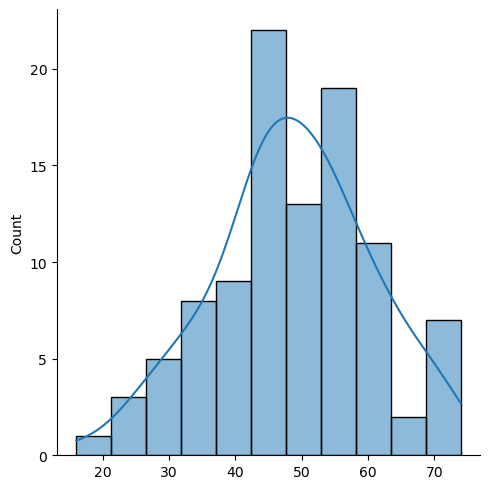

In [20]:
sns.displot(sample,kde=True)

<Axes: >

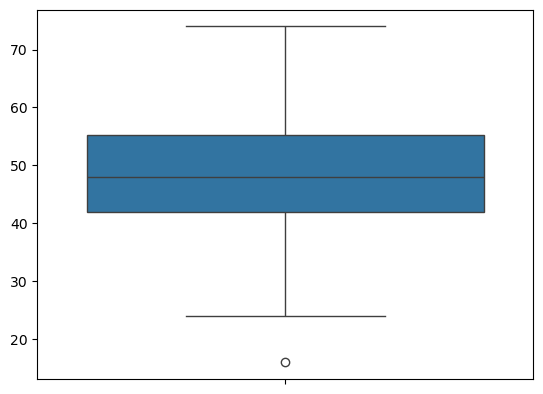

In [21]:
sns.boxplot(sample)

In [22]:
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [23]:
def fix_value(age):
    if age < 18:
        return 18
    else: 
        return age
ser.apply(fix_value).describe()        

count    100.000000
mean      48.680000
std       11.766139
min       18.000000
25%       42.000000
50%       48.000000
75%       55.250000
max       74.000000
dtype: float64

In [27]:
df = pd.read_csv("./Ames_Housing_Data.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


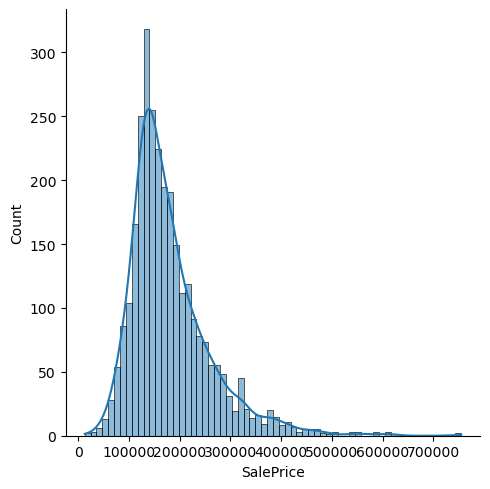

In [28]:
sns.displot(data=df["SalePrice"],kde=True)

In [30]:
numder_df = df.select_dtypes(include=["number"])
numder_df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

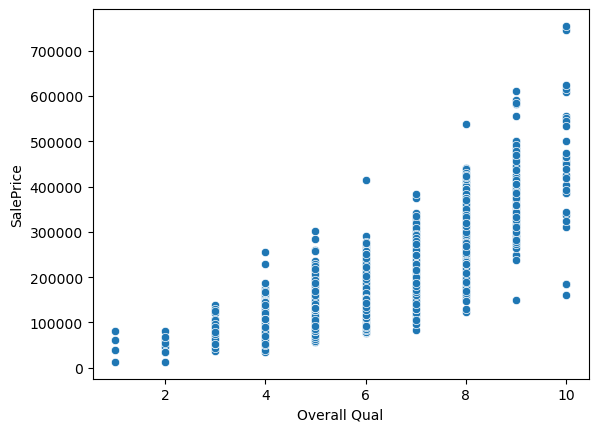

In [31]:
sns.scatterplot(x="Overall Qual",y="SalePrice",data=df)

In [32]:
df[(df["Overall Qual"] > 8)&(df["SalePrice"] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [ ]:
#作業
# x =Gr Liv Area y=SalePrice